Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns 
import statsmodels.formula.api as smf

In [2]:
data =pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.shape

(1436, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data['Model']

0           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
1           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
2           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
3           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
4             TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors
                              ...                        
1431           TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors
1432    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1433    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1434    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1435          TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors
Name: Model, Length: 1436, dtype: object

In [7]:
data1=data[["Id","Model","Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [8]:
data2=data1.copy()

In [9]:
data2.head()

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [10]:
data2=data2.rename({'Age_08_04':'Age'},axis=1)

In [11]:
data2[data2.duplicated()].shape

(0, 11)

In [12]:
data2.isnull().sum()

Id               0
Model            0
Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [13]:
data2.dtypes

Id                int64
Model            object
Price             int64
Age               int64
KM                int64
HP                int64
cc                int64
Doors             int64
Gears             int64
Quarterly_Tax     int64
Weight            int64
dtype: object

In [14]:
data2.shape

(1436, 11)

In [15]:
data2.corr()

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.240821,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Hierarical clustering

In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [17]:
def nor_funt(i):
    x=(i-i.mean())/(i.max()-i.min())
    return(x)

In [18]:
df_norm = nor_funt(data2.iloc[:,2:])

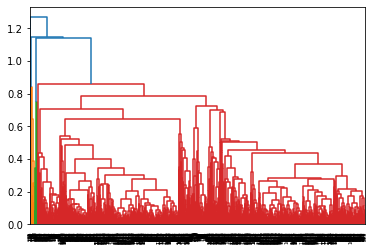

In [19]:
#dendrogram=sch.dendrogram(sch.linkage(df_norm, method='average'))

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'single')

In [21]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [22]:
data2['Cluster']=hc.labels_

In [23]:
data2.groupby(['Cluster']).mean()

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Cluster,,,,,,,,,,
0,978.000000,9450.000000,58.000000,47210.500000,110.000000,1600.000000,4.500000,3.000000,78.500000,1109.500000
1,82.333333,22616.666667,25.666667,45510.666667,192.000000,1800.000000,5.000000,5.333333,73.000000,1191.666667
2,964.000000,9390.000000,66.000000,50806.000000,86.000000,1300.000000,3.000000,5.000000,19.000000,1480.000000
3,530.659864,11147.217687,51.258503,112978.768707,81.068027,1943.285714,4.061224,5.000000,195.537415,1147.170068
4,751.479117,10536.058314,56.891253,63977.620173,103.044917,1519.938534,4.031521,5.027581,74.068558,1060.810875
5,223.000000,12450.000000,44.000000,74172.000000,110.000000,1600.000000,5.000000,5.000000,163.000000,1615.000000
6,605.000000,7500.000000,50.000000,1.000000,90.000000,2000.000000,3.000000,5.000000,64.000000,1260.000000
7,81.000000,18950.000000,25.000000,20019.000000,110.000000,16000.000000,5.000000,5.000000,100.000000,1180.000000
8,112.000000,31591.666667,4.000000,1833.666667,116.000000,2000.000000,5.000000,5.000000,283.000000,1480.000000


In [24]:
data2=data2.drop('Cluster',axis=1)

# Multi-linear Regression

In [25]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [26]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [27]:
model.pvalues

Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

# vif

In [28]:
rsq_A=smf.ols('Age~KM+Doors+Gears+Weight+HP+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_A=1/(1-rsq_A)
rsq_K=smf.ols('KM~Age+Doors+Gears+Weight+HP+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_K=1/(1-rsq_K)
rsq_D=smf.ols('Doors~Age+KM+Gears+Weight+HP+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_D=1/(1-rsq_D)
rsq_G=smf.ols('Gears~Age+KM+Doors+Weight+HP+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_G=1/(1-rsq_G)
rsq_W=smf.ols('Weight~Age+KM+Doors+Gears+HP+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_W=1/(1-rsq_W)
rsq_H=smf.ols('HP~KM+Doors+Gears+Weight+Age+Quarterly_Tax+cc',data=data2).fit().rsquared
vif_H=1/(1-rsq_H)
rsq_c=smf.ols('cc~KM+Doors+Gears+Weight+Age+Quarterly_Tax+HP',data=data2).fit().rsquared
vif_c=1/(1-rsq_H)
rsq_q=smf.ols('Quarterly_Tax~KM+Doors+Gears+Weight+Age+HP+cc',data=data2).fit().rsquared
vif_q=1/(1-rsq_H)
vif_frame=pd.DataFrame({'Variables':['Age','KM','Doors','Gears','Weight','HP','cc','Quarterly_Tax'],'VIF':[vif_A,vif_K,vif_D,vif_G,vif_W,vif_H,vif_c,vif_q]})
vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,Doors,1.156575
3,Gears,1.098723
4,Weight,2.516420
5,HP,1.419422
6,cc,1.419422
7,Quarterly_Tax,1.419422


# residual analysis

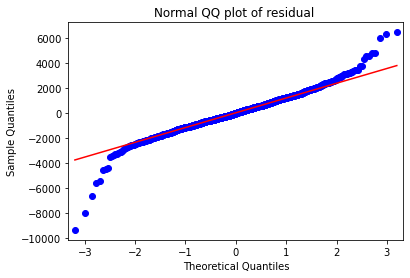

In [29]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q')
plt.title("Normal QQ plot of residual ")
plt.show()

In [30]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [31]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

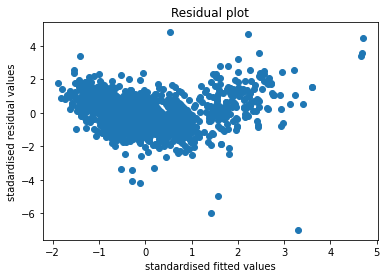

In [32]:
plt.scatter(get_standardised_values(model.fittedvalues),get_standardised_values(model.resid))
plt.title("Residual plot")
plt.xlabel("standardised fitted values")
plt.ylabel("stadardised residual values")
plt.show()

# residual vs regressors

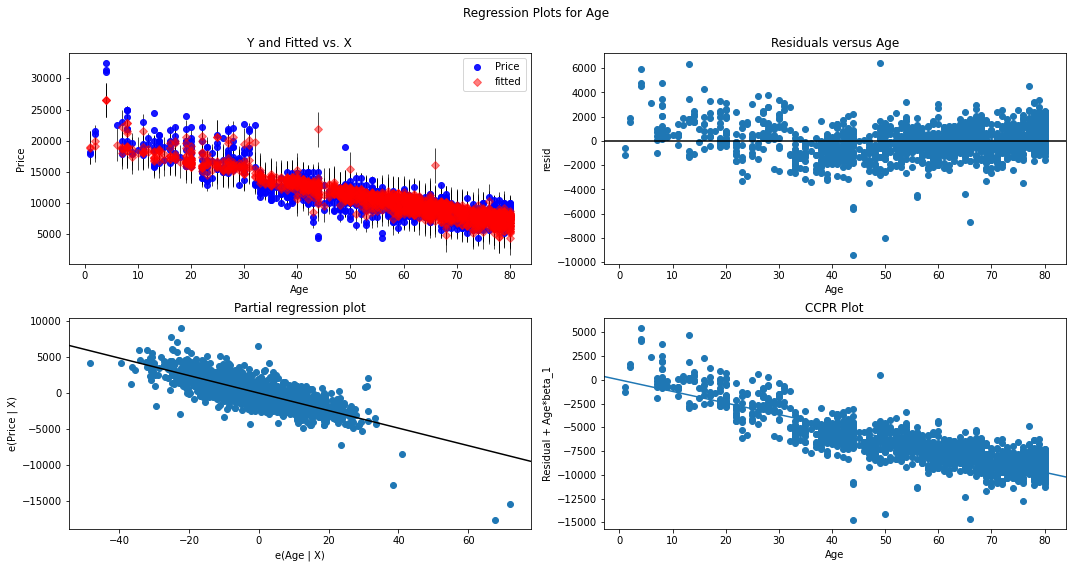

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

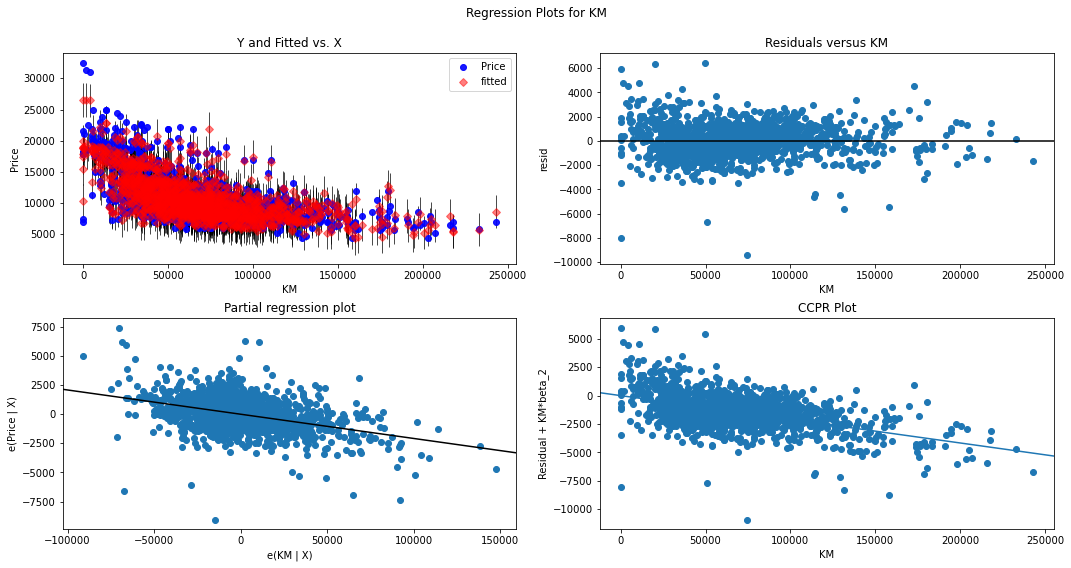

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

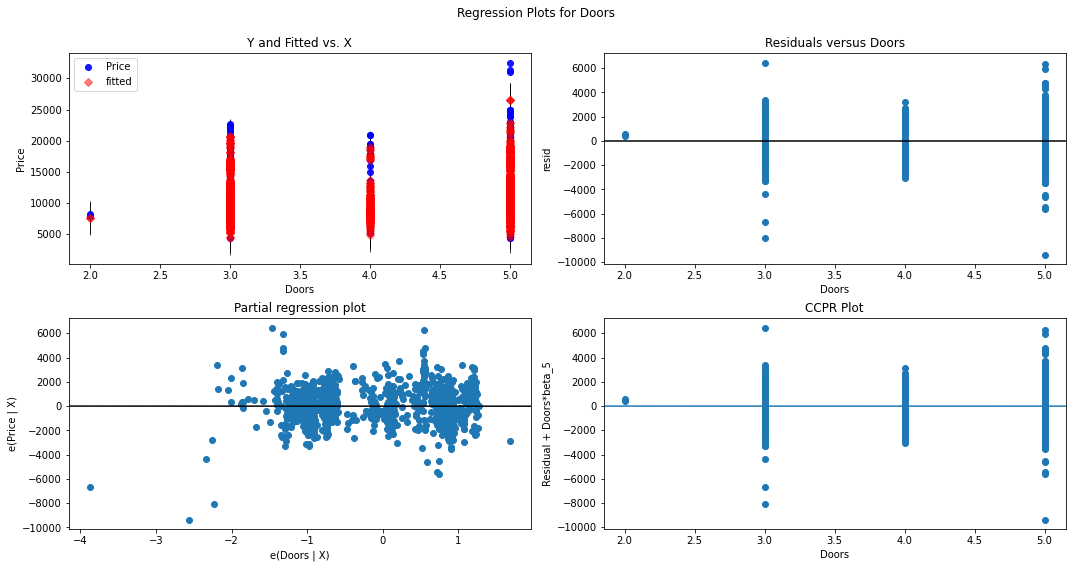

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

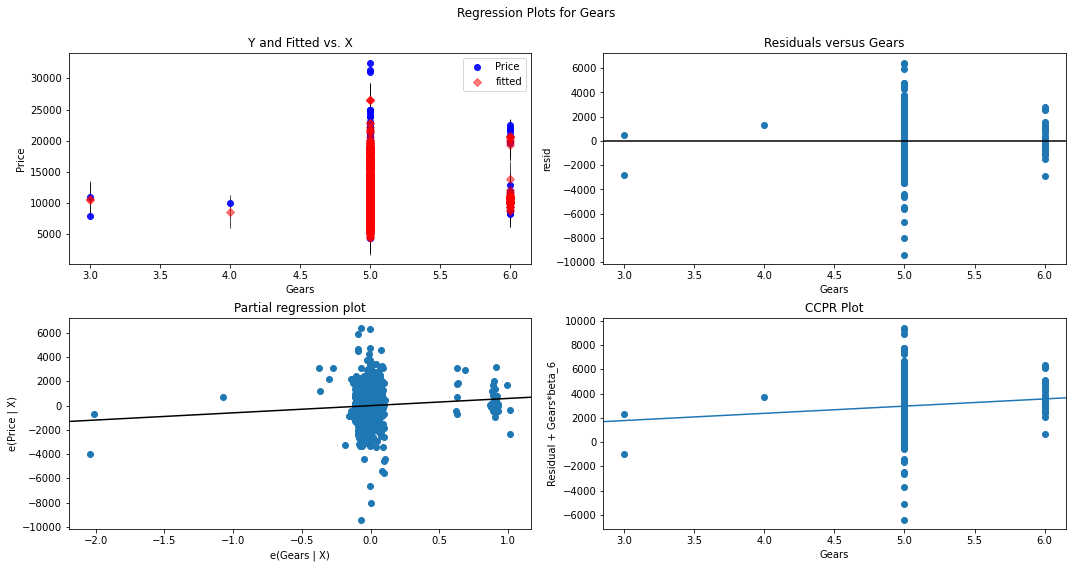

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

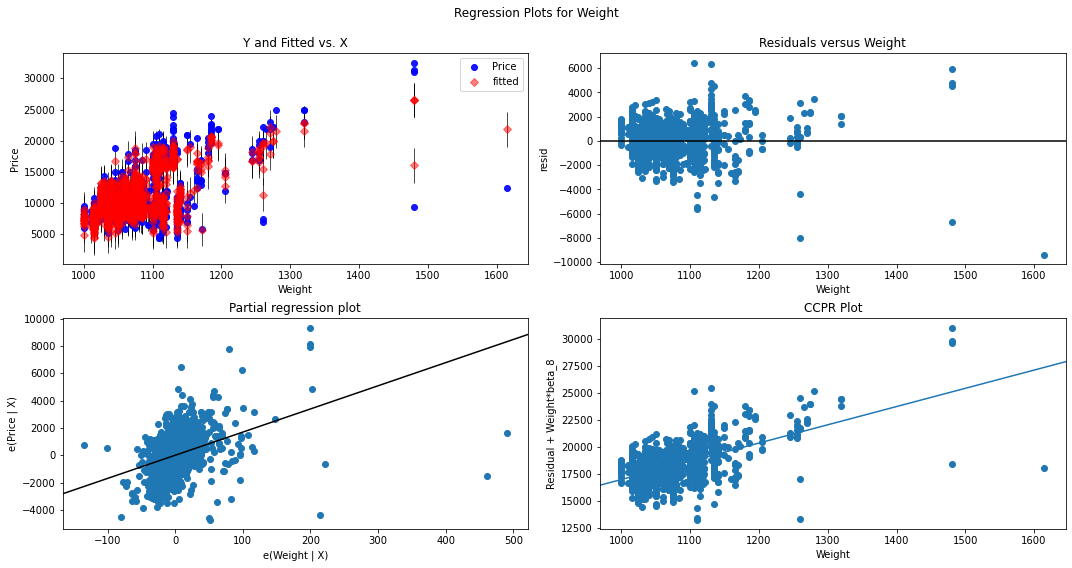

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

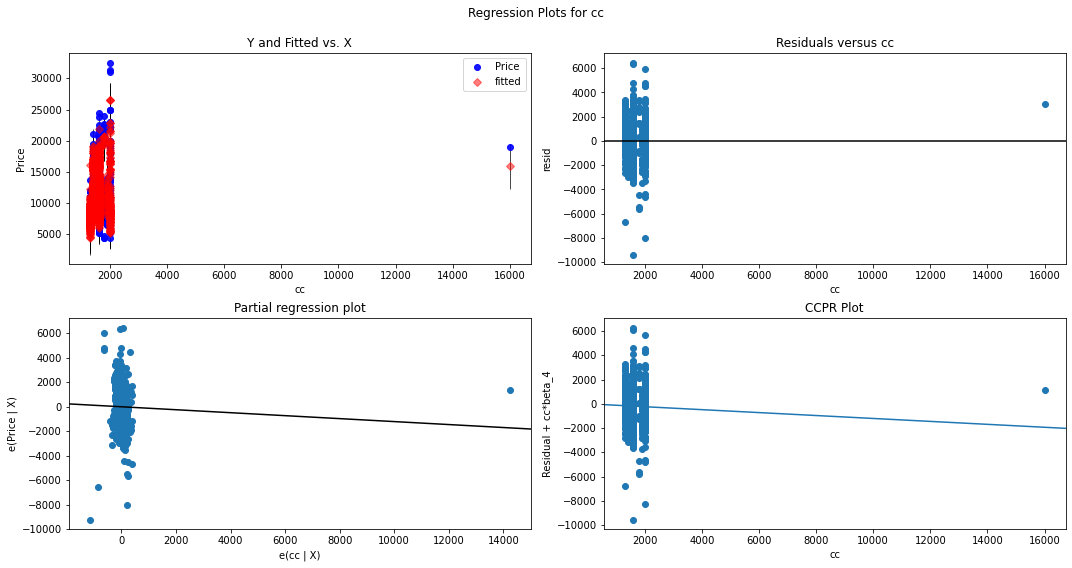

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

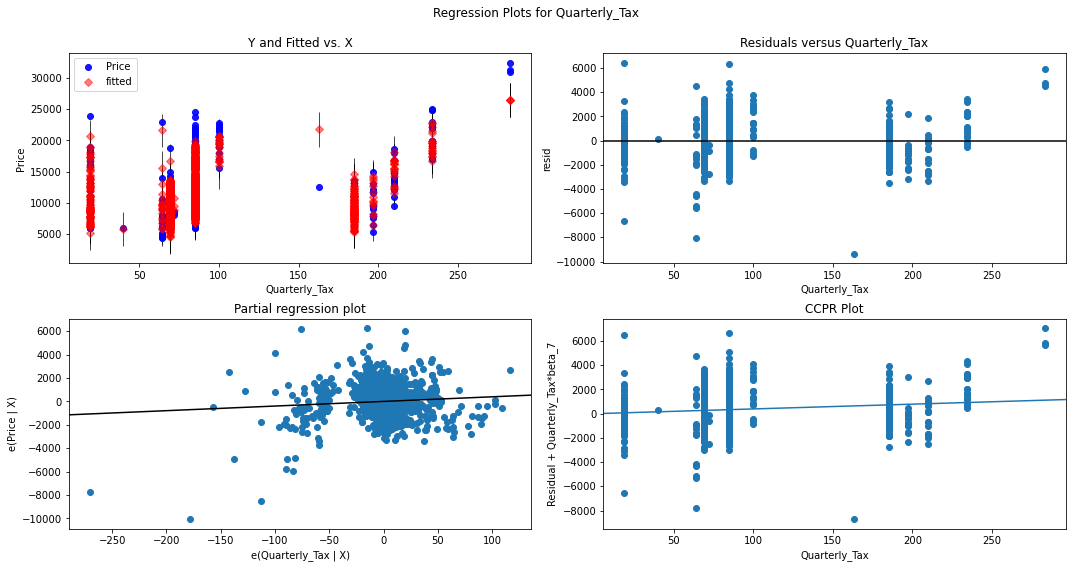

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

# Model deletion

In [40]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [41]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<ipython-input-42-0516da4fc7e5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data2)), np.round(c,3))


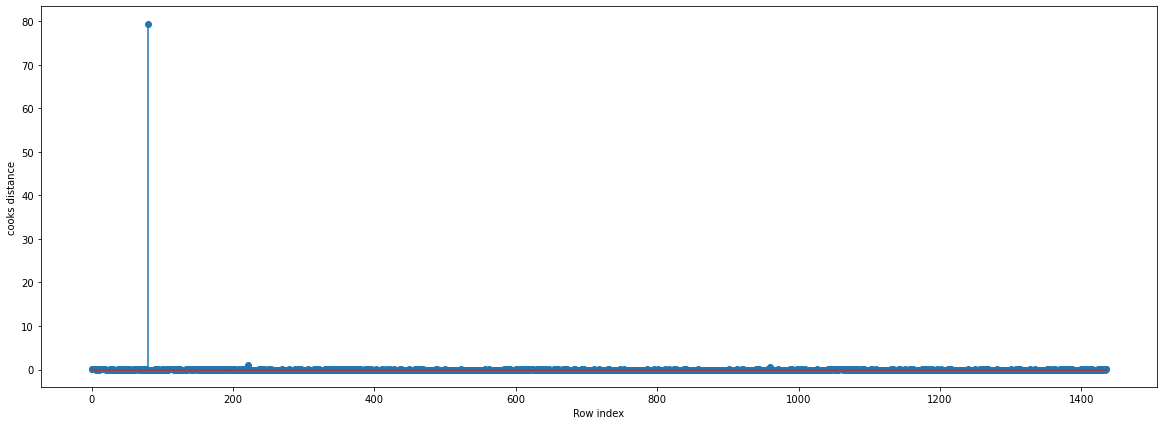

In [42]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

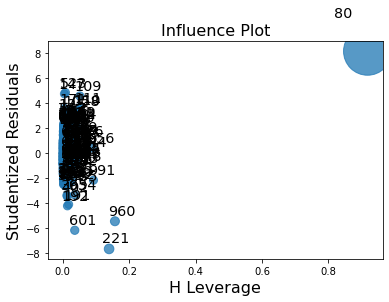

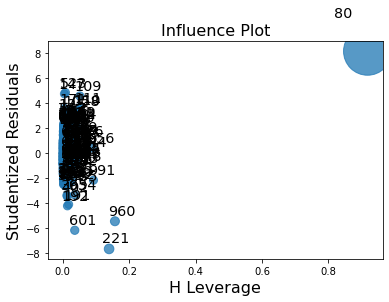

In [44]:
influence_plot(model)

In [45]:
K =data2.shape[1]
n =data2.shape[0]
leverage_cutoff=3*((K+1)/n)

In [46]:
leverage_cutoff

0.02506963788300836

In [47]:
data2[data2.index.isin([80])]


,Id,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,20019,110,16000,5,5,100,1180


In [48]:
data2=data2.drop(data2.index[[80]],axis=0).reset_index()

In [49]:
data2

,index,Id,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [50]:
final=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [51]:
(final.rsquared,final.aic)

(0.8693790488655818, 24687.28102432684)

In [52]:
model_influence=final.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-53-0516da4fc7e5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data2)), np.round(c,3))


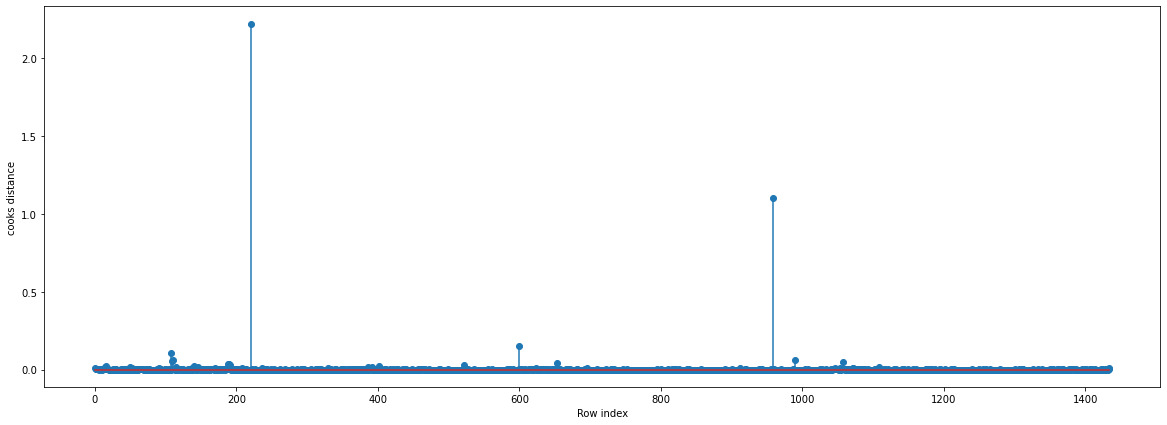

In [53]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [54]:
A=list(np.where(c>0.15))

[array([220, 600, 959], dtype=int64)]

NameError: name 'A' is not defined

In [ ]:
data2=data2.drop(data2.index[A],axis=0).reset_index()

In [ ]:
final1=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [ ]:
(final1.rsquared,final1.aic)
#0.88362   0.05 cooksdistance
#0.88684   0.10
#0.88941   0.15
#0.88518   0.20

In [ ]:
newdata=pd.DataFrame({'Age':55.969993,'KM':68575.550593,'Doors':4.032798,'Gears':5.026518,'Weight':1071.721563,'HP':101.501047,'cc':1566.967900,'Quarterly_Tax':87.108165},index=[1])

In [ ]:
data2.describe()

In [ ]:
final1.predict(newdata)